# LIVER DISEASE PREDICTION

In this project, we are going to use the Indian Liver Patient Records dataset from Kaggle. We will predict whether a patient has liver disease or not based on certain features. We are going to check with the total proteins, albumin, etc. whether it is associated with the disease or not.

****

# Import the Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
warnings.filterwarnings('ignore')

C:\Users\meris\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Reading the Dataset

In [2]:
patients_data = pd.read_csv('data/indian_liver_patient.csv')
patients_data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [3]:
patients_data.shape

(583, 11)

**Our dataset contains 583 rows and 11 columns.**

# Exploratory Data Analysis

**Let us check the number of male and female using a countplot.**

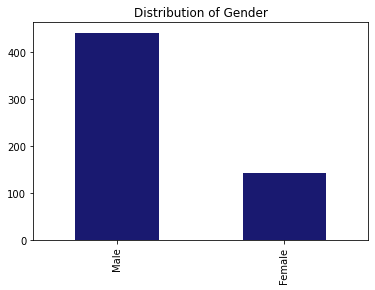

In [4]:
patients_data['Gender'].value_counts().plot.bar(color='midnightblue')
plt.title("Distribution of Gender");

**From the above graph, we can see that Number of males are more than the Number of females.**

**Diagnosis of the patients**

The column named Dataset has two values, 1 symbolises that the patient has 
disease and 0 symbolises that the patient has no disease.**

In [5]:
# changing the column name
patients_data.rename(columns={'Dataset': 'Diagnosis'}, inplace=True)

**Let us check the countplot of our Diagnosis column.**

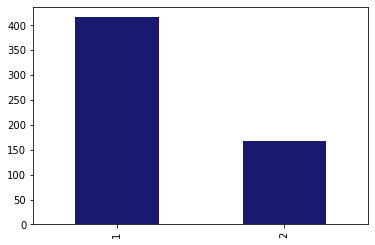

In [6]:
patients_data['Diagnosis'].value_counts().plot.bar(color='midnightblue');

**Our dataset contains more patients with a positive liver disease diagnosis than the ones with no disease.**

### Checking for null values

Let us check for the null values.

In [7]:
patients_data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Diagnosis                     0
dtype: int64

**We can see that there are 4 null values in the Albumin and Globulin Ratio column.**

### Filling null values

Let us fill these null values by imputing the mean of that column.

In [9]:
mean_ratio = patients_data['Albumin_and_Globulin_Ratio'].mean()
mean_ratio

0.9470639032815201

In [10]:
patients_data = patients_data.fillna(mean_ratio)

**We have now filled the null values with the mean of that column.** 

In [11]:
patients_data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Diagnosis                     0
dtype: int64

**We have now removed all the null values from our dataset.**

**Let us view the pairplot of the patients data based on Gender.**

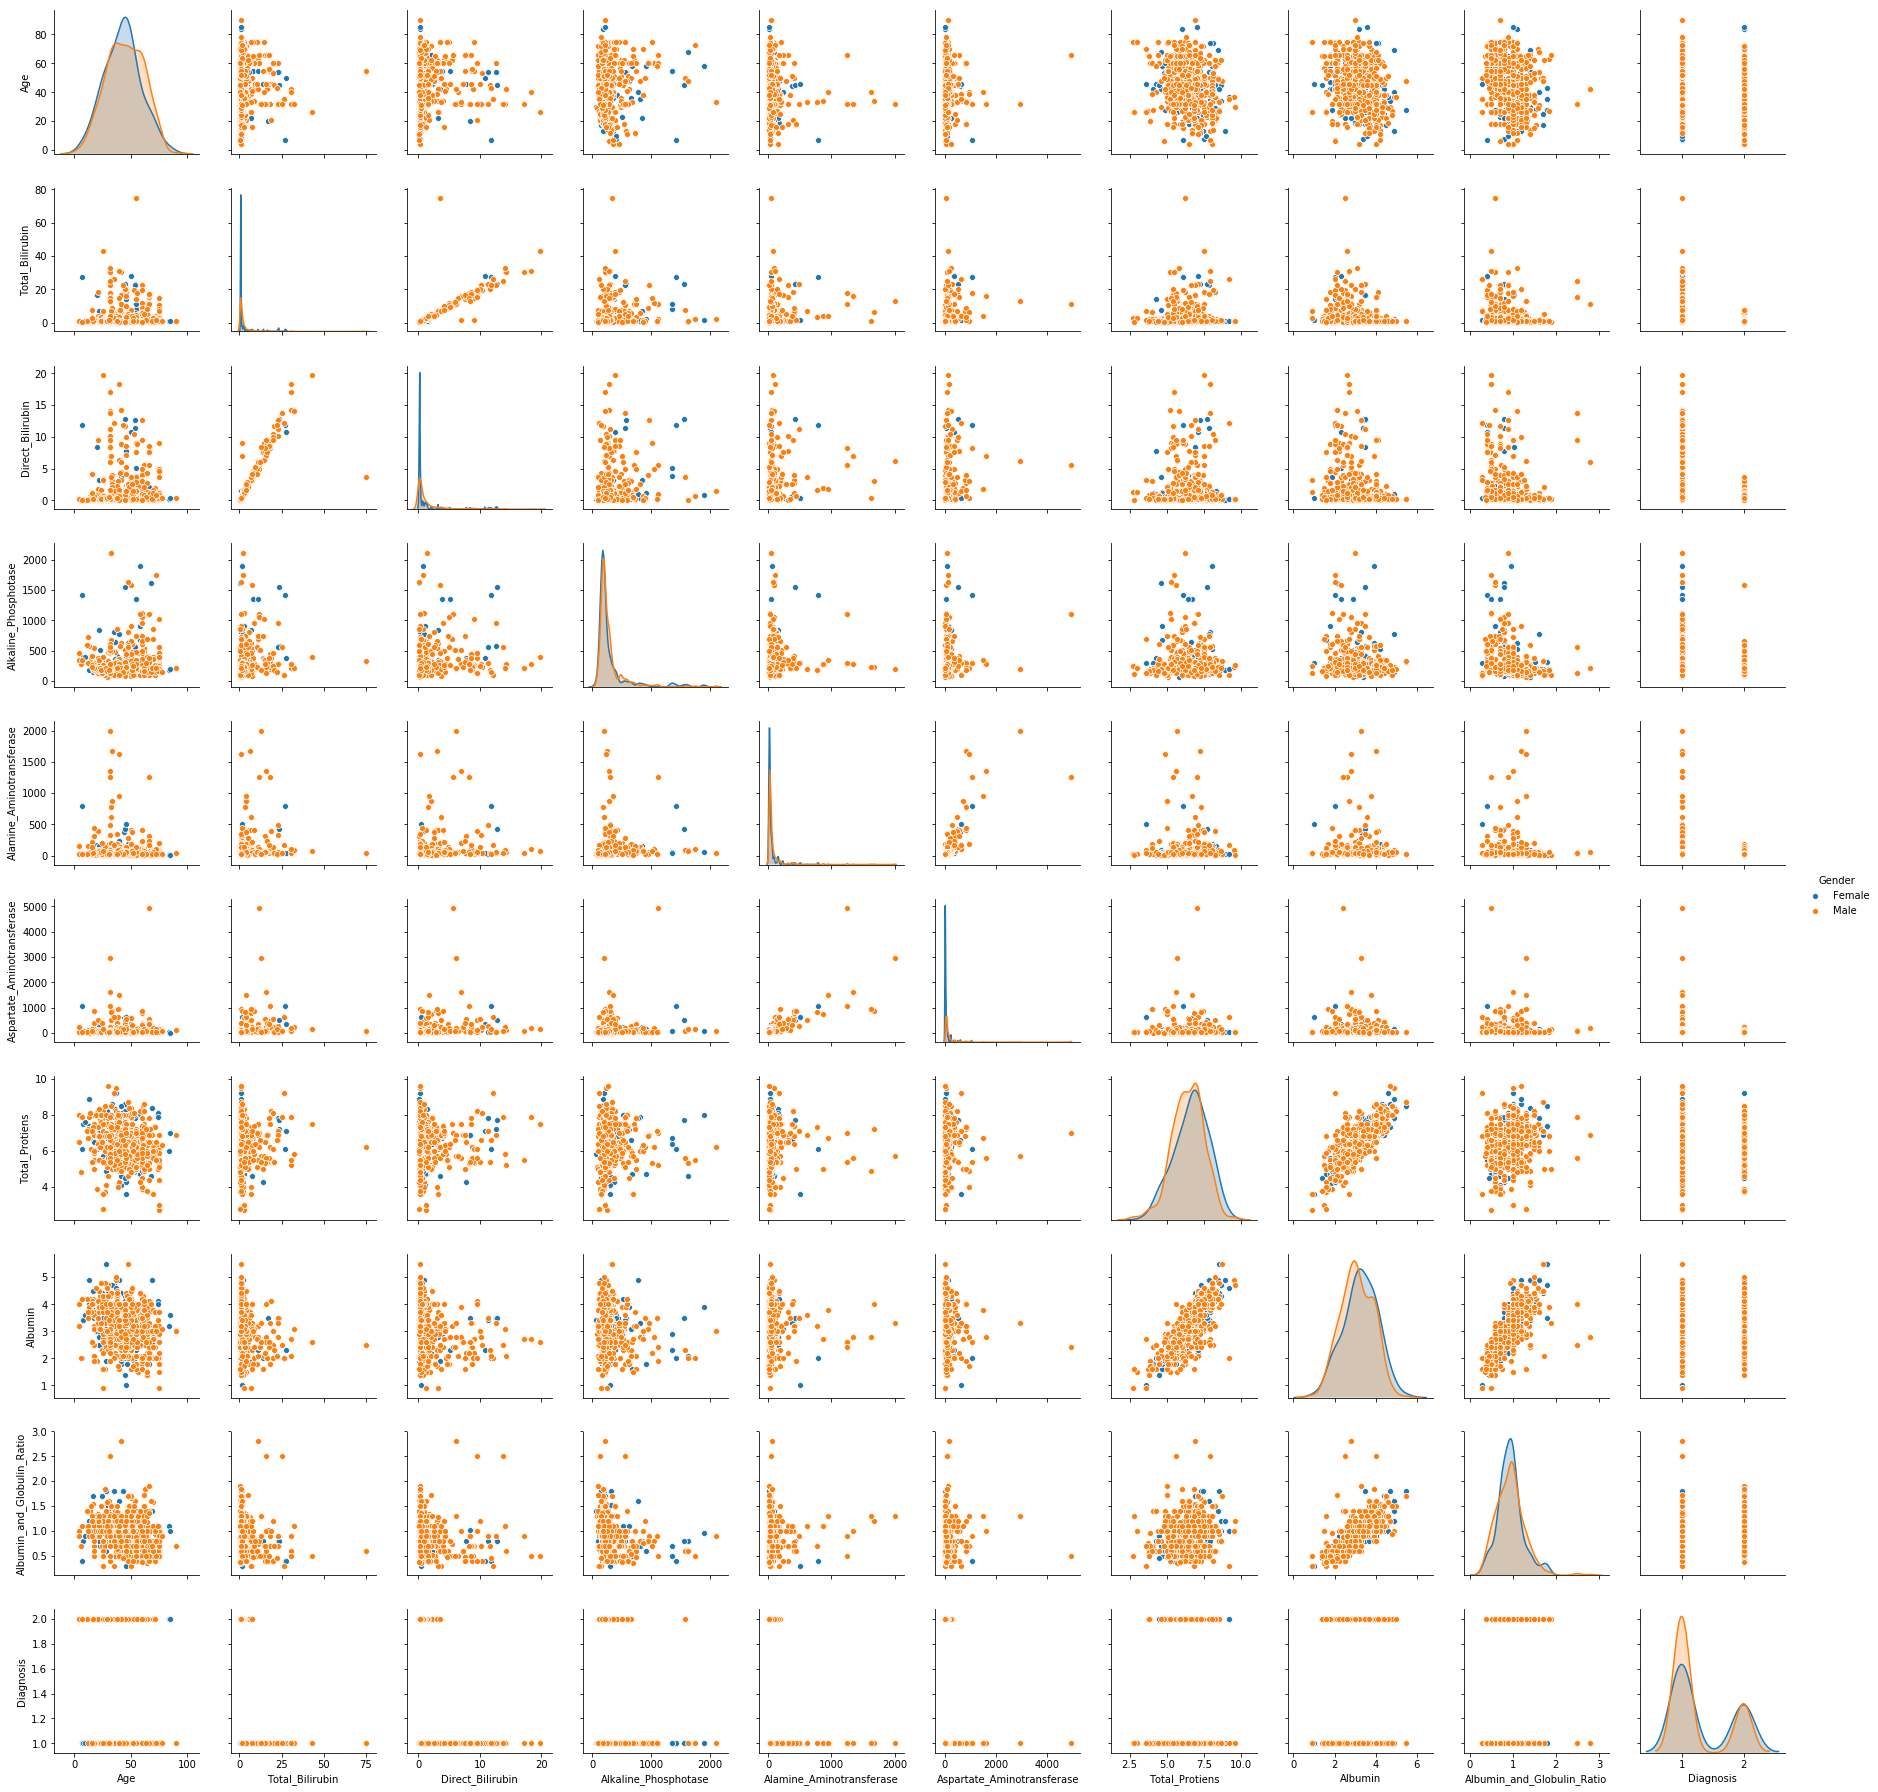

In [12]:
plt.rcParams['figure.figsize']=(10,10)
sns.pairplot(patients_data,hue='Gender')

### Comparing the albumin and albumin & globulin ratio by a scatterplot

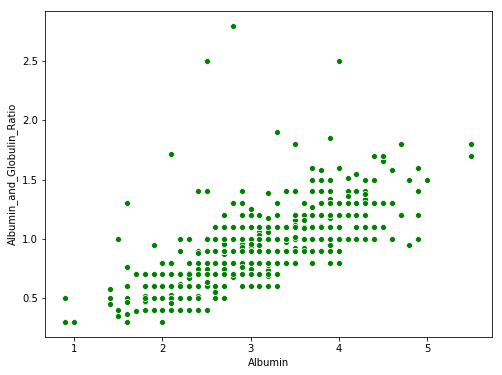

In [13]:
f, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(x="Albumin", y="Albumin_and_Globulin_Ratio",color='green',data=patients_data);
plt.show()

### Gender based comparison of different metrics

The protein Intake for males and females are as follows.

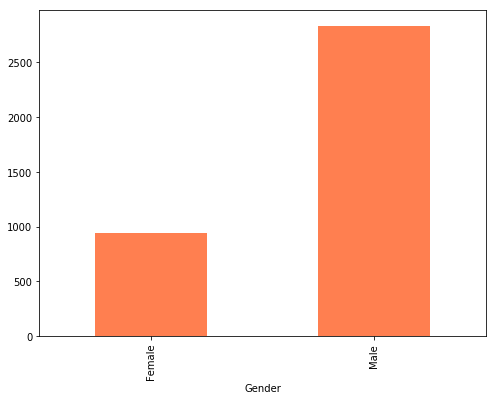

In [14]:
plt.figure(figsize=(8,6))
patients_data.groupby('Gender').sum()["Total_Protiens"].plot.bar(color='coral')

The protein intake is higher in the case of Male and comparitively less in females.

The Albumin Level for males and females is as follows.

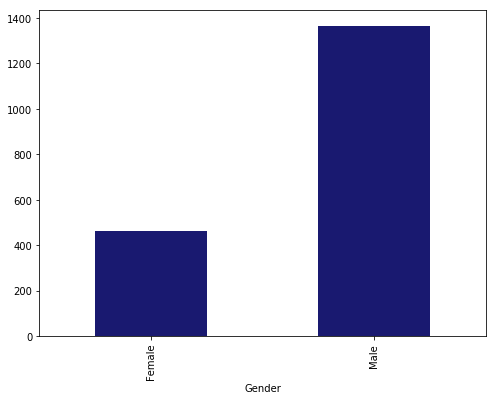

In [15]:
plt.figure(figsize=(8,6))
patients_data.groupby('Gender').sum()['Albumin'].plot.bar(color='midnightblue')

It is clear that the Albumin Level is higher in the case of male as compared to female.

The Bilirubin content for males and females is as follows.

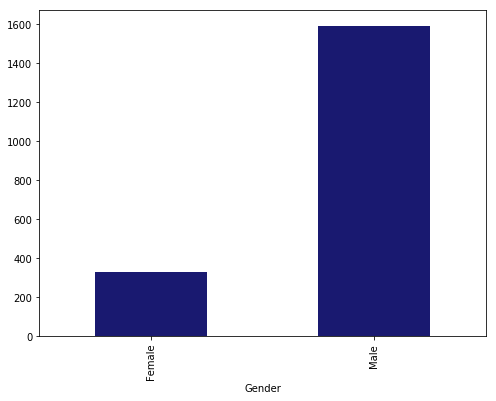

In [17]:
plt.figure(figsize=(8,6))
patients_data.groupby('Gender').sum()['Total_Bilirubin'].plot.bar(color='midnightblue')

**We can clearly see that males has more bilirubin content compared to females.**

**Another point to be noted here is that higher the Bilirubin content, higher the case is prone to Liver disease.**

### Converting categorical column to binary numerical

In [18]:
patients_data['Gender'] = patients_data['Gender'].apply(lambda x:1 if x=='Male' else 0)

patients_data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Diagnosis
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1


**Let us check the correlation between the features using a heatmap:**

In [19]:
corr=patients_data.corr()

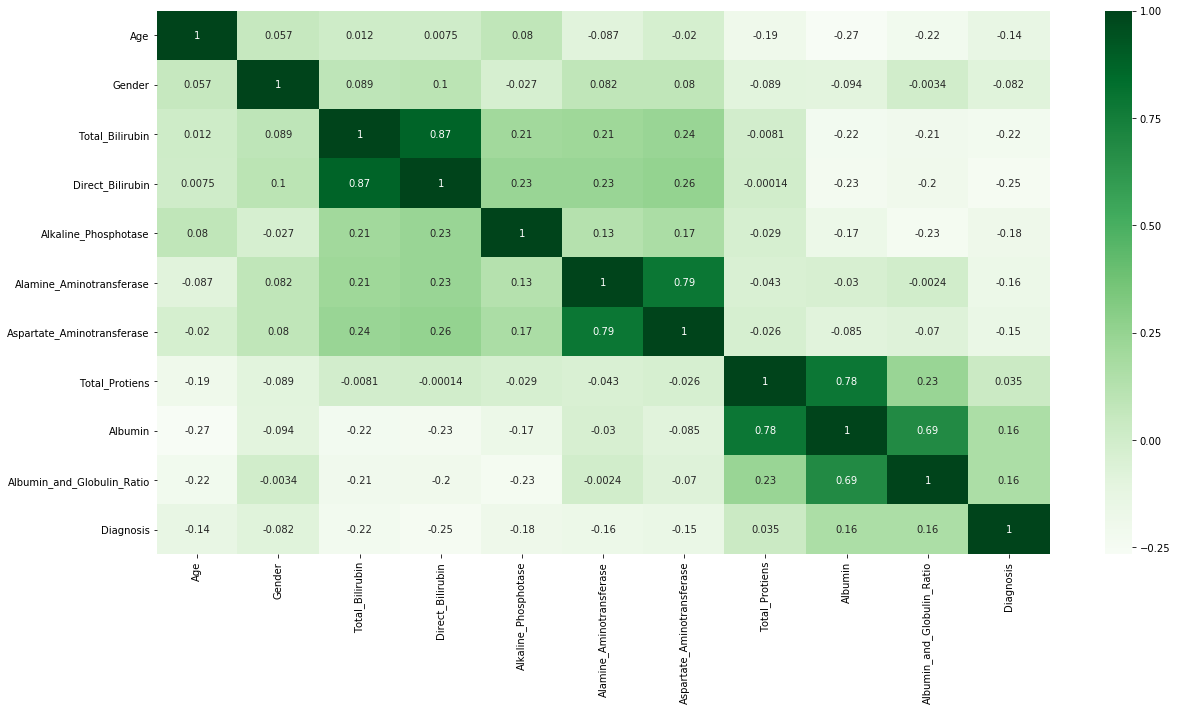

In [20]:
plt.figure(figsize=(20,10)) 
sns.heatmap(corr,cmap="Greens",annot=True)

## Building the classification model

**So Let us start building our model.**

**Inorder to build a successful model we have to train and test the model.**

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
patients_data.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Diagnosis'],
      dtype='object')

**Now let us define our X and y.**

**Here X is our features and y is our target.**

In [23]:
X=patients_data[['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio']]
y=patients_data['Diagnosis']

In [40]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=21)

**We split the training and testing  in a certain ratio as 70 for training and 30 for testing.**

**Now inorder to build our model we use Logistic Regression**

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

**Now, Let us import the cross validation score and Kfold and split them into 5.**

**Finally, we are calculating the accuracy of our model.**

In [42]:
from sklearn.metrics import accuracy_score
y_pred = logmodel.predict(X_test)
accuracy_score(y_test, y_pred)

0.7657142857142857

In [35]:
from sklearn.model_selection import KFold, cross_val_score
kfold = KFold(n_splits=5,random_state=42)
logmodel = LogisticRegression(C=1, penalty='l1')
results = cross_val_score(logmodel, X_train,y_train,cv = kfold)
print(results)
print("Accuracy:",results.mean()*100)

[0.74390244 0.79268293 0.67073171 0.72839506 0.69135802]
Accuracy: 72.5414031918097


**Thus we can conclude that our model performed at an accuracy of 71.5%.**